In [ ]:
#ECT summer school project
#Analyzing active target data
#22Mg alpha scattering

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import datasets, cluster # for k-means clustering
from sklearn.cluster import KMeans
import random # if we want to create a Variational Autoencoder
# This is simply an alias for convenience
layers = tf.keras.layers

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
def plot_confusion_matrix(y_true,
                          y_pred,
                          classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """This function prints and plots the confusion matrix.
    
    Adapted from:
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    Arguments:
        y_true: Real class labels.
        y_pred: Predicted class labels.
        classes: List of class names.
        title: Title for the plot.
        cmap: Colormap to be used.
    
    Returns:
        None.
    """
    if not title:
        title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha='center', va='center',
                    color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    plt.show()

In [4]:
data_origin = 'https://github.com/NuclearTalent/MachineLearningECT/raw/master/doc/ProjectsExercises/2020/ProjectAT/pdf/Mg22_alphaalpha_digiSim.h5'

data_path = tf.keras.utils.get_file('Mg22_alphaalpha_digiSim.h5', origin=data_origin)

#h5 = h5py.File(data_path, 'r')

In [5]:
#with h5py.File(data_path, 'r') as f:
  #  alist = []
  #  ls = list(f.keys())
 #   print('List of datasets: \n', ls)
 #   for group in ls:
   #      data = f.get(group)
   #      dataset = data[:]
   #      print('Shape of dataset: \n', dataset.shape)
   #      alist.append(dataset)

In [6]:
with h5py.File(data_path, 'r') as f:
    data_list = []
    ls = list(f.keys())
    print('List of datasets: \n', ls)
    for key in ls:
         group = f.get(key)
         dataset = group[:]
         print('Shape of dataset: \n', dataset.shape)
         data_list.append(dataset)

List of datasets: 
 ['Event_[0]', 'Event_[1000]', 'Event_[1001]', 'Event_[1002]', 'Event_[1003]', 'Event_[1004]', 'Event_[1005]', 'Event_[1006]', 'Event_[1007]', 'Event_[1008]', 'Event_[1009]', 'Event_[100]', 'Event_[1010]', 'Event_[1011]', 'Event_[1012]', 'Event_[1013]', 'Event_[1014]', 'Event_[1015]', 'Event_[1016]', 'Event_[1017]', 'Event_[1018]', 'Event_[1019]', 'Event_[101]', 'Event_[1020]', 'Event_[1021]', 'Event_[1022]', 'Event_[1023]', 'Event_[1024]', 'Event_[1025]', 'Event_[1026]', 'Event_[1027]', 'Event_[1028]', 'Event_[1029]', 'Event_[102]', 'Event_[1030]', 'Event_[1031]', 'Event_[1032]', 'Event_[1033]', 'Event_[1034]', 'Event_[1035]', 'Event_[1036]', 'Event_[1037]', 'Event_[1038]', 'Event_[1039]', 'Event_[103]', 'Event_[1040]', 'Event_[1041]', 'Event_[1042]', 'Event_[1043]', 'Event_[1044]', 'Event_[1045]', 'Event_[1046]', 'Event_[1047]', 'Event_[1048]', 'Event_[1049]', 'Event_[104]', 'Event_[1050]', 'Event_[1051]', 'Event_[1052]', 'Event_[1053]', 'Event_[1054]', 'Event_[105

Shape of dataset: 
 (214,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (225,)
Shape of dataset: 
 (193,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (219,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (46,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (23,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (13,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (227,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (269,)
Shape of dataset: 
 (23,)
Shape of dataset: 
 (214,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (238,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (248,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (204,)
Shape of dataset: 
 (262,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (203,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (31,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (209,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (32,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (258,)
Shape of dataset: 
 (24,

 (206,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (108,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (208,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (163,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (228,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (218,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (186,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (214,)
Shape of dataset: 
 (195,)
Shape of dataset: 
 (204,)
Shape of dataset: 
 (23,)
Shape of dataset: 
 (50,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (31,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (64,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (143,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (234,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (23,)
Shape of dataset: 
 (88,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (163,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (342,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (52,)
Shape of dataset: 
 (24,)
Shape of dataset:

Shape of dataset: 
 (24,)
Shape of dataset: 
 (223,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (224,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (150,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (13,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (211,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (231,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (39,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (50,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (97,)
Shape of dataset: 
 (219,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (32,)
Shape of dataset: 
 (228,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (387,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (275,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (145,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (182,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (164,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (293,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (201,

Shape of dataset: 
 (261,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (241,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (102,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (253,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (142,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (155,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (178,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (51,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (197,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (282,)
Shape of dataset: 
 (249,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (211,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (214,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (118,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (240,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (197,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (198,)
Shape of dataset: 
 (24,)
Shape of dataset: 
 (34,)
Shape of dataset: 
 (2

In [7]:
ls

['Event_[0]',
 'Event_[1000]',
 'Event_[1001]',
 'Event_[1002]',
 'Event_[1003]',
 'Event_[1004]',
 'Event_[1005]',
 'Event_[1006]',
 'Event_[1007]',
 'Event_[1008]',
 'Event_[1009]',
 'Event_[100]',
 'Event_[1010]',
 'Event_[1011]',
 'Event_[1012]',
 'Event_[1013]',
 'Event_[1014]',
 'Event_[1015]',
 'Event_[1016]',
 'Event_[1017]',
 'Event_[1018]',
 'Event_[1019]',
 'Event_[101]',
 'Event_[1020]',
 'Event_[1021]',
 'Event_[1022]',
 'Event_[1023]',
 'Event_[1024]',
 'Event_[1025]',
 'Event_[1026]',
 'Event_[1027]',
 'Event_[1028]',
 'Event_[1029]',
 'Event_[102]',
 'Event_[1030]',
 'Event_[1031]',
 'Event_[1032]',
 'Event_[1033]',
 'Event_[1034]',
 'Event_[1035]',
 'Event_[1036]',
 'Event_[1037]',
 'Event_[1038]',
 'Event_[1039]',
 'Event_[103]',
 'Event_[1040]',
 'Event_[1041]',
 'Event_[1042]',
 'Event_[1043]',
 'Event_[1044]',
 'Event_[1045]',
 'Event_[1046]',
 'Event_[1047]',
 'Event_[1048]',
 'Event_[1049]',
 'Event_[104]',
 'Event_[1050]',
 'Event_[1051]',
 'Event_[1052]',
 'Eve

In [8]:
# null events - drop later

ls[1315], ls[1367], ls[1426], ls[1904], ls[227]

('Event_[384]', 'Event_[430]', 'Event_[484]', 'Event_[914]', 'Event_[1204]')

In [9]:
len(data_list) #list of all data

2000

In [10]:
# Get mean X, mean Y, mean Z, sum charge (A) and pads per event of each event - 5 features

MeanXPerEvent = np.zeros(len(data_list))
MeanYPerEvent = np.zeros(len(data_list))
MeanZPerEvent = np.zeros(len(data_list))
SumAPerEvent = np.zeros(len(data_list))
PadsPerEvent = np.zeros(len(data_list))
MeanWeightedXPerEvent = np.zeros(len(data_list))
MeanWeightedYPerEvent = np.zeros(len(data_list))


for i in range(len(data_list)):

    for j in range(len(data_list[i])):
        MeanXPerEvent[i] = MeanXPerEvent[i] + data_list[i][j][0]
        MeanYPerEvent[i] = MeanYPerEvent[i] + data_list[i][j][1]
        MeanZPerEvent[i] = MeanZPerEvent[i] + data_list[i][j][2]
        SumAPerEvent[i] = SumAPerEvent[i] + data_list[i][j][4]
        MeanWeightedXPerEvent[i] = MeanWeightedXPerEvent[i] + data_list[i][j][0]*data_list[i][j][4]
        MeanWeightedYPerEvent[i] = MeanWeightedYPerEvent[i] + data_list[i][j][1]*data_list[i][j][4]
    
    MeanXPerEvent[i] = MeanXPerEvent[i]/len(data_list[i])
    MeanYPerEvent[i] = MeanYPerEvent[i]/len(data_list[i])
    MeanZPerEvent[i] = MeanZPerEvent[i]/len(data_list[i])
    MeanWeightedXPerEvent[i] = MeanWeightedXPerEvent[i]/len(data_list[i])
    MeanWeightedYPerEvent[i] = MeanWeightedYPerEvent[i]/len(data_list[i])
    
    
    PadsPerEvent[i] = len(data_list[i])
    
print('Mean X: ', MeanXPerEvent)
print('Mean Y: ', MeanYPerEvent)
print('Mean Z: ', MeanZPerEvent)
print('Sum A: ', SumAPerEvent)
print('Pads Per Event: ', PadsPerEvent)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


Mean X:  [-3.33786011e-06 -3.33786011e-06 -5.02050898e+01 ...  3.25863287e+01
 -1.35606981e+01  5.43063274e+01]
Mean Y:  [  0.           0.          73.20708939 ...  34.43843417 -42.65288681
  45.8022323 ]
Mean Z:  [961.08333333 906.         632.62348178 ... 810.73387097 832.40316206
 511.22807018]
Sum A:  [ 41292.86413493  31217.01207053 499641.06871211 ... 699913.56628626
 710494.46160276 185975.79407417]
Pads Per Event:  [ 24.  24. 247. ... 248. 253. 171.]


In [11]:
# Let's put all the averages + labels in a pandas dataframe

X = pd.DataFrame(columns=['Mean X', 'Mean Y', 'Mean Z', 'Sum A', 'Pads Per Event'])

X['Mean X'] = MeanXPerEvent
X['Mean Y'] = MeanYPerEvent
X['Mean Z'] = MeanZPerEvent
X['Sum A'] = SumAPerEvent
X['Pads Per Event'] = PadsPerEvent

X

,Mean X,Mean Y,Mean Z,Sum A,Pads Per Event
0,-0.000003,0.000000,961.083333,41292.864135,24.0
1,-0.000003,0.000000,906.000000,31217.012071,24.0
2,-50.205090,73.207089,632.623482,499641.068712,247.0
3,-0.000003,0.000000,861.166667,62706.139828,24.0
4,-15.420464,-82.019116,553.773196,455713.339001,194.0
...,...,...,...,...,...
1995,51.475499,-20.725882,572.198758,245578.546315,161.0
1996,-0.000003,0.000000,975.833333,21639.822495,24.0
1997,32.586329,34.438434,810.733871,699913.566286,248.0
1998,-13.560698,-42.652887,832.403162,710494.461603,253.0


In [12]:
# Now for the labels - update list to have only the number of an event (makes it easier to iterate)

ls_updated = [i.split('Event_[', 10)[1] for i in ls]
ls_updated1 = [i.split(']', 1)[0] for i in ls_updated]

ls_updated1

['0',
 '1000',
 '1001',
 '1002',
 '1003',
 '1004',
 '1005',
 '1006',
 '1007',
 '1008',
 '1009',
 '100',
 '1010',
 '1011',
 '1012',
 '1013',
 '1014',
 '1015',
 '1016',
 '1017',
 '1018',
 '1019',
 '101',
 '1020',
 '1021',
 '1022',
 '1023',
 '1024',
 '1025',
 '1026',
 '1027',
 '1028',
 '1029',
 '102',
 '1030',
 '1031',
 '1032',
 '1033',
 '1034',
 '1035',
 '1036',
 '1037',
 '1038',
 '1039',
 '103',
 '1040',
 '1041',
 '1042',
 '1043',
 '1044',
 '1045',
 '1046',
 '1047',
 '1048',
 '1049',
 '104',
 '1050',
 '1051',
 '1052',
 '1053',
 '1054',
 '1055',
 '1056',
 '1057',
 '1058',
 '1059',
 '105',
 '1060',
 '1061',
 '1062',
 '1063',
 '1064',
 '1065',
 '1066',
 '1067',
 '1068',
 '1069',
 '106',
 '1070',
 '1071',
 '1072',
 '1073',
 '1074',
 '1075',
 '1076',
 '1077',
 '1078',
 '1079',
 '107',
 '1080',
 '1081',
 '1082',
 '1083',
 '1084',
 '1085',
 '1086',
 '1087',
 '1088',
 '1089',
 '108',
 '1090',
 '1091',
 '1092',
 '1093',
 '1094',
 '1095',
 '1096',
 '1097',
 '1098',
 '1099',
 '109',
 '10',
 '1100'

In [13]:
# our labels (classes)

LabelsList = []

for i in ls_updated1:
    if (int(i)%2==0):
        LabelsList.append(1)
    else:
        LabelsList.append(0)
        
labels = np.array(LabelsList) #labels in numPy array

print(labels)

[1 1 0 ... 0 0 0]


In [14]:
# target (labels) in another pandas dataframe
y = pd.DataFrame(columns=['Labels'])

y['Labels'] = labels
#y['Event'] = ls # only to make sure events were classified properly
y

,Labels
0,1
1,1
2,0
3,1
4,0
...,...
1995,0
1996,1
1997,0
1998,0


In [15]:
# put X + y + event name

X['Labels'] = y
X['Event'] = ls

X

,Mean X,Mean Y,Mean Z,Sum A,Pads Per Event,Labels,Event
0,-0.000003,0.000000,961.083333,41292.864135,24.0,1,Event_[0]
1,-0.000003,0.000000,906.000000,31217.012071,24.0,1,Event_[1000]
2,-50.205090,73.207089,632.623482,499641.068712,247.0,0,Event_[1001]
3,-0.000003,0.000000,861.166667,62706.139828,24.0,1,Event_[1002]
4,-15.420464,-82.019116,553.773196,455713.339001,194.0,0,Event_[1003]
...,...,...,...,...,...,...,...
1995,51.475499,-20.725882,572.198758,245578.546315,161.0,0,Event_[997]
1996,-0.000003,0.000000,975.833333,21639.822495,24.0,1,Event_[998]
1997,32.586329,34.438434,810.733871,699913.566286,248.0,0,Event_[999]
1998,-13.560698,-42.652887,832.403162,710494.461603,253.0,0,Event_[99]


In [16]:
# drop empty events from both X and y
# ( 384,      430,       484,      914,     1204)
# ls[1315], ls[1367], ls[1426], ls[1904], ls[227]

X_drop = X.drop(X.index[[1315, 1367, 1426, 1904, 227]])

X_drop

,Mean X,Mean Y,Mean Z,Sum A,Pads Per Event,Labels,Event
0,-0.000003,0.000000,961.083333,41292.864135,24.0,1,Event_[0]
1,-0.000003,0.000000,906.000000,31217.012071,24.0,1,Event_[1000]
2,-50.205090,73.207089,632.623482,499641.068712,247.0,0,Event_[1001]
3,-0.000003,0.000000,861.166667,62706.139828,24.0,1,Event_[1002]
4,-15.420464,-82.019116,553.773196,455713.339001,194.0,0,Event_[1003]
...,...,...,...,...,...,...,...
1995,51.475499,-20.725882,572.198758,245578.546315,161.0,0,Event_[997]
1996,-0.000003,0.000000,975.833333,21639.822495,24.0,1,Event_[998]
1997,32.586329,34.438434,810.733871,699913.566286,248.0,0,Event_[999]
1998,-13.560698,-42.652887,832.403162,710494.461603,253.0,0,Event_[99]


In [17]:
# now let's see the whole thing to make sure we're on the right track

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(X_drop)

,Mean X,Mean Y,Mean Z,Sum A,Pads Per Event,Labels,Event
0,-0.000003,0.000000,961.083333,41292.864135,24.0,1,Event_[0]
1,-0.000003,0.000000,906.000000,31217.012071,24.0,1,Event_[1000]
2,-50.205090,73.207089,632.623482,499641.068712,247.0,0,Event_[1001]
3,-0.000003,0.000000,861.166667,62706.139828,24.0,1,Event_[1002]
4,-15.420464,-82.019116,553.773196,455713.339001,194.0,0,Event_[1003]
5,0.320099,0.063076,852.869565,64587.708121,23.0,1,Event_[1004]
6,-1.784816,0.772847,536.636364,68567.223230,22.0,0,Event_[1005]
7,0.213399,-0.247887,950.956522,48768.594106,23.0,1,Event_[1006]
8,-30.146727,32.399210,617.960352,586659.856788,454.0,0,Event_[1007]
9,-0.000003,0.000000,911.333333,48591.514236,24.0,1,Event_[1008]


In [18]:
X_drop.shape

(1995, 7)

In [19]:
# separate y

y = pd.DataFrame(X_drop['Labels'])

y

,Labels
0,1
1,1
2,0
3,1
4,0
...,...
1995,0
1996,1
1997,0
1998,0


In [20]:
y.shape

(1995, 1)

In [21]:
# getting X_final

X_final = pd.DataFrame(X_drop[['Mean X', 'Mean Y', 'Mean Z', 'Sum A', 'Pads Per Event']])

X_final

,Mean X,Mean Y,Mean Z,Sum A,Pads Per Event
0,-0.000003,0.000000,961.083333,41292.864135,24.0
1,-0.000003,0.000000,906.000000,31217.012071,24.0
2,-50.205090,73.207089,632.623482,499641.068712,247.0
3,-0.000003,0.000000,861.166667,62706.139828,24.0
4,-15.420464,-82.019116,553.773196,455713.339001,194.0
...,...,...,...,...,...
1995,51.475499,-20.725882,572.198758,245578.546315,161.0
1996,-0.000003,0.000000,975.833333,21639.822495,24.0
1997,32.586329,34.438434,810.733871,699913.566286,248.0
1998,-13.560698,-42.652887,832.403162,710494.461603,253.0


In [22]:
# Split both X (input) and y (target) into train + test + validation (for parameter tuning)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_final, y, test_size = 0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.10, random_state=42)

print("Train set(X): ", X_train.shape)
print("Test set(X): ", X_test.shape)
print("Validation set(X): ", X_val.shape)
print("Training set(y): ", y_train.shape)
print("Test set(y): ", y_test.shape)
print("Validation set(y): ", y_val.shape)

Train set(X):  (1615, 5)
Test set(X):  (200, 5)
Validation set(X):  (180, 5)
Training set(y):  (1615, 1)
Test set(y):  (200, 1)
Validation set(y):  (180, 1)


In [23]:
X_train.shape

(1615, 5)

In [24]:
y_train.shape

(1615, 1)

In [25]:
# put it back in a numPy array

X_drop.query('Labels==0')['Mean X']

2      -50.205090
4      -15.420464
6       -1.784816
8      -30.146727
10     -19.852416
          ...    
1993    19.126538
1995    51.475499
1997    32.586329
1998   -13.560698
1999    54.306327
Name: Mean X, Length: 1000, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

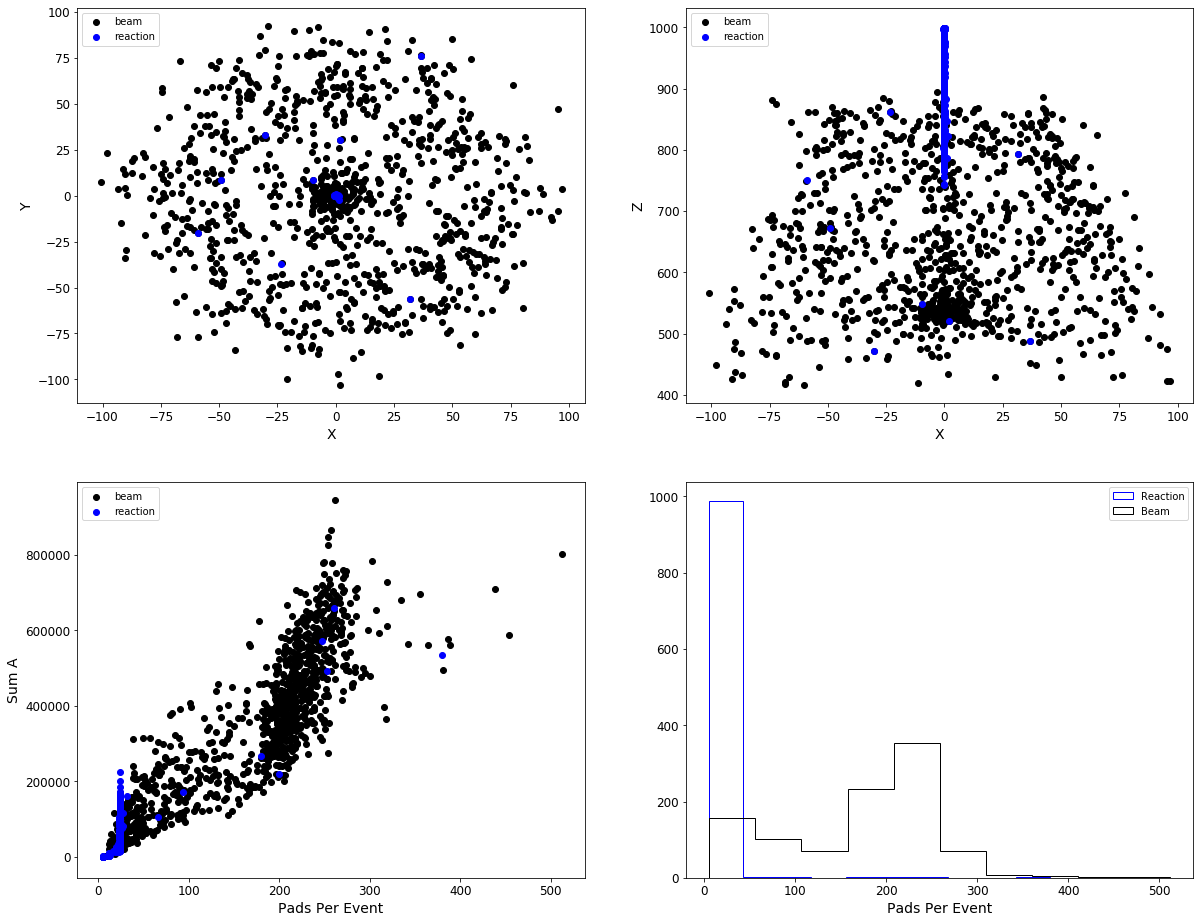

In [26]:
# visulaize training set

fig, axs = plt.subplots(2, 2, figsize=(20, 16))

axs[0, 0].scatter(X_drop.query('Labels==0')['Mean X'], X_drop.query('Labels==0')['Mean Y'], c='k', label = "beam")
axs[0, 0].scatter(X_drop.query('Labels==1')['Mean X'], X_drop.query('Labels==1')['Mean Y'], c='b', label = "reaction")
axs[0, 0].set_xlabel("X")
axs[0, 0].set_ylabel("Y")
axs[0, 0].legend(loc="upper left")

axs[0, 1].scatter(X_drop.query('Labels==0')['Mean X'], X_drop.query('Labels==0')['Mean Z'], c='k', label = "beam")
axs[0, 1].scatter(X_drop.query('Labels==1')['Mean X'], X_drop.query('Labels==1')['Mean Z'], c='b', label = "reaction")
axs[0, 1].set_xlabel("X")
axs[0, 1].set_ylabel("Z")
axs[0, 1].legend(loc="upper left")

axs[1, 0].scatter(X_drop.query('Labels==0')['Pads Per Event'], X_drop.query('Labels==0')['Sum A'], c='k', 
                  label = "beam")
axs[1, 0].scatter(X_drop.query('Labels==1')['Pads Per Event'], X_drop.query('Labels==1')['Sum A'], c='b',
                  label = "reaction")
axs[1, 0].set_xlabel("Pads Per Event")
axs[1, 0].set_ylabel("Sum A")
axs[1, 0].legend(loc="upper left")

axs[1, 1].hist(X_drop.query('Labels==1')['Pads Per Event'], color='blue', label = 'Reaction', histtype = 'step')
axs[1, 1].hist(X_drop.query('Labels==0')['Pads Per Event'], color='black', label = 'Beam', histtype = 'step')
axs[1, 1].set_xlabel("Pads Per Event")
axs[1, 1].legend(loc="upper right")


#plt.xlabel("Beam axis", fontsize=14)
#plt.ylabel("y-coordinate", fontsize=14)

plt.show

In [27]:
# Feature Importance
# Compute feature importance through feature_importances_ variable
# Train RandomForestClassifier on iris dataset and output each feature’s importance

from sklearn.ensemble import RandomForestClassifier

# just before anything, don't forget to flatten your data

y_train = y_train.values.ravel() # from (10, 1) to (10, ) for example 

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train, y_train) #model trained first

for name, score in zip(X_train.columns, rnd_clf.feature_importances_): #then check every feature importance
    print(name, score)

Mean X 0.06743007486681743
Mean Y 0.04552329839906427
Mean Z 0.23406530812544157
Sum A 0.20324083146409475
Pads Per Event 0.44974048714458204


In [28]:
# We see here that:
# Mean X -> 6.7% (not that important)
# Mean Y -> 4.5% (not so important)
# Mean Z -> 23% (important feature)
# Sum A -> 20% (important feature)
# Pads Per Event -> 45% (most important feature)

In [29]:
# Looks good, but let's see if we can do better

validation set accuracy: 0.994
Confusion matrix for training set:



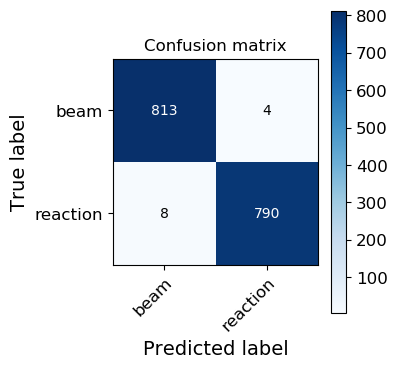

Accuracy: 0.9925696594427245
Precision: 0.9949622166246851
Recall: 0.9899749373433584
F1-score: 0.9924623115577889
MCC: 0.9851484869290649
Confusion matrix for validation set:



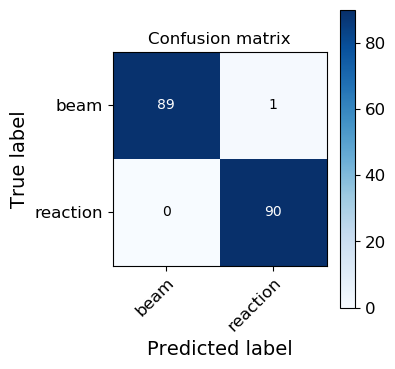

Accuracy: 0.9944444444444445
Precision: 0.989010989010989
Recall: 1.0
F1-score: 0.994475138121547
MCC: 0.9889499370655616


In [30]:
# Let's try to simply train different models first
# Logistic regression
# Confusion matrix (a better way than accuracy)
# precision = TP/TP+FP (TP: true positive, FP: false positive)
# recall = TP/TP+FN


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef

scaler = StandardScaler()
scaler.fit(X_train)

X_train_stsc = scaler.transform(X_train)
X_val_stsc = scaler.transform(X_val)

logreg = LogisticRegression()
logreg.fit(X_train_stsc, y_train)
print("validation set accuracy: {:.3f}".format(logreg.score(X_val_stsc, y_val)))

LR_pred_train = logreg.predict(X_train_stsc)
LR_pred_val = logreg.predict(X_val_stsc)

# Accuracy, confusion matrix, precision, recall, f1 and mcc for 'Validation Set' 

accuracy = accuracy_score(y_val, LR_pred_val)
confmat = confusion_matrix(y_val, LR_pred_val)
f1 = f1_score(y_val, LR_pred_val)
mcc = matthews_corrcoef(y_val, LR_pred_val)
precision = precision_score(y_val, LR_pred_val)
recall = recall_score(y_val, LR_pred_val)

# Accuracy, confusion matrix, precision, recall, f1 and mcc for 'Training Set'

accuracy_train = accuracy_score(y_train, LR_pred_train)
confmat_train = confusion_matrix(y_train, LR_pred_train)
f1_train = f1_score(y_train, LR_pred_train)
mcc_train = matthews_corrcoef(y_train, LR_pred_train)
precision_train = precision_score(y_train, LR_pred_train)
recall_train = recall_score(y_train, LR_pred_train)

print("Confusion matrix for training set:\n")
plot_confusion_matrix(y_train, LR_pred_train, ["beam","reaction"])
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)
print("MCC:", mcc_train)

print("Confusion matrix for validation set:\n")
plot_confusion_matrix(y_val, LR_pred_val, ["beam","reaction"])
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("MCC:", mcc)

In [31]:
# Diagonal elements represent the number of points for which the predicted label is equal to the true label
# off-diagonal elements are those that are mislabeled by the classifier
# these results make sense as we didn't do any hyperparameter tuning

# 813 reaction -> correctly classified
# 4 reaction -> worngly classified
# 790 beam -> 
# 8 beam ->

{'bootstrap': True, 'max_features': 2, 'n_estimators': 6}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[(0.7651905390109209, 'nrofpads'), (0.1088966128858419, 'charge'), (0.0625107095989596, 'z'), (0.05086055664945526, 'x'), (0.01254158185482225, 'y')]
Confusion matrix for training set:



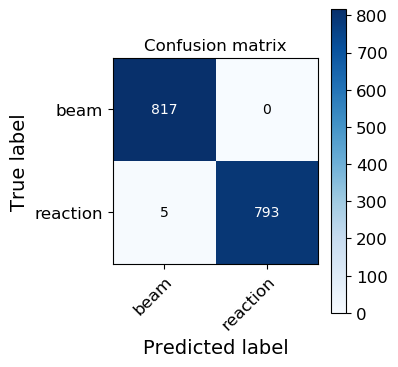

Accuracy: 0.9969040247678018
Precision: 1.0
Recall: 0.993734335839599
F1-score: 0.9968573224387177
MCC: 0.9938258011800574
[1 1 0 ... 0 0 1]
Confusion matrix for validation set:



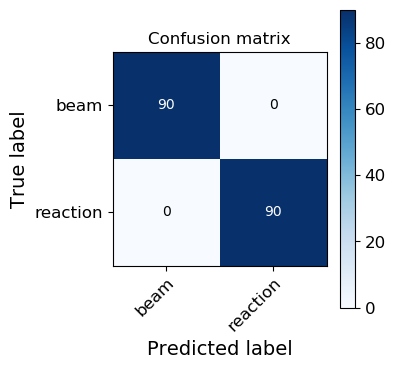

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
MCC: 1.0


In [32]:
# Grid Search can help you find best parameters and estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#RFC = RandomForestClassifier()
#RFC.fit(xSimple_train_stsc, Labels_train)

#RFC_pred_train = RFC.predict(xSimple_train_stsc)
#RFC_mse_train = mean_squared_error(Labels_train, RFC_pred_train)
#RFC_rmse_train = np.sqrt(RFC_mse_train)
#print('random forest rmse of training data is: ', RFC_rmse_train)

#scores = cross_val_score(RFC, xSimple_train_stsc, Labels_train, scoring="neg_mean_squared_error", cv=10)
#RFC_scores = np.sqrt(-scores)
#display_scores(RFC_scores)


param_grid = [
{'n_estimators': [3, 4,5,6], 'max_features': [2,3,4,5], 'bootstrap': [False,True]},
]
RFC = RandomForestClassifier()
grid_search_imp = GridSearchCV(RFC, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_imp.fit(X_train_stsc, y_train)
print(grid_search_imp.best_params_)
print(grid_search_imp.best_estimator_)

cvres = grid_search_imp.cv_results_
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    #print(np.sqrt(-mean_score), params)

feature_importances = grid_search_imp.best_estimator_.feature_importances_
print(sorted(zip(feature_importances, ["x","y","z","charge","nrofpads"]), reverse=True))

RFC_best = grid_search_imp.best_estimator_
RFC_pred_train = RFC_best.predict(X_train_stsc)
RFC_pred_val = RFC_best.predict(X_val_stsc)
#forest_mse_imp_final = mean_squared_error(trdata_labels, deaths_predictions_forest_final)
#forest_rmse_imp_final = np.sqrt(forest_mse_imp_final)
#print('random forest rmse (final version) of training data is: ', forest_rmse_imp)

accuracy = accuracy_score(y_val, RFC_pred_val)
confmat = confusion_matrix(y_val, RFC_pred_val)
f1 = f1_score(y_val, RFC_pred_val)
mcc = matthews_corrcoef(y_val, RFC_pred_val)
precision = precision_score(y_val, RFC_pred_val)
recall = recall_score(y_val, RFC_pred_val)

accuracy_train = accuracy_score(y_train, RFC_pred_train)
confmat_train = confusion_matrix(y_train, RFC_pred_train)
f1_train = f1_score(y_train, RFC_pred_train)
mcc_train = matthews_corrcoef(y_train, RFC_pred_train)
precision_train = precision_score(y_train, RFC_pred_train)
recall_train = recall_score(y_train, RFC_pred_train)

print("Confusion matrix for training set:\n")
plot_confusion_matrix(y_train, RFC_pred_train, ["beam","reaction"])
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)
print("MCC:", mcc_train)
print(RFC_pred_train)

print("Confusion matrix for validation set:\n")
plot_confusion_matrix(y_val, RFC_pred_val, ["beam","reaction"])
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("MCC:", mcc)
#print(RFC_pred_val)

In [33]:
# Dense Neural Network
# Build architechture

# Init the Sequential model
model = tf.keras.Sequential()
# Add Input layer
model.add(tf.keras.layers.InputLayer(input_shape=(X_train_stsc.shape[1],)))

# Add hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Add output layer.
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Finally, compile the model and print a summary. Loss function and optimizer is set during compilation.
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [34]:
# train the model
# Set parameters for the training run. The full data set is only 2000x5 doubles so large nr of epochs and
# small batch_size will still work well even on cpu

epochs = 20
batch_size = 16

# The validation_data keywork expects a 'tuple' (val_x, val_y) so we make one on the fly
history = model.fit(
    x=X_train_stsc,
    y=y_train,
    validation_data=(X_val_stsc, y_val),
    epochs=epochs,
    batch_size=batch_size,
)

Epoch 1/20
101/101 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.8594 - val_loss: 0.2013 - val_accuracy: 0.9944
Epoch 2/20
101/101 [==============================] - 0s 1ms/step - loss: 0.1440 - accuracy: 0.9882 - val_loss: 0.0778 - val_accuracy: 0.9944
Epoch 3/20
101/101 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9907 - val_loss: 0.0422 - val_accuracy: 0.9944
Epoch 4/20
101/101 [==============================] - 0s 1ms/step - loss: 0.0595 - accuracy: 0.9913 - val_loss: 0.0284 - val_accuracy: 0.9944
Epoch 5/20
101/101 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9920 - val_loss: 0.0230 - val_accuracy: 0.9944
Epoch 6/20
101/101 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9926 - val_loss: 0.0190 - val_accuracy: 0.9944
Epoch 7/20
101/101 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.9926 - val_loss: 0.0171 - val_accuracy: 0.9944
Epoch 

ValueError: Found input variables with inconsistent numbers of samples: [180, 1615]

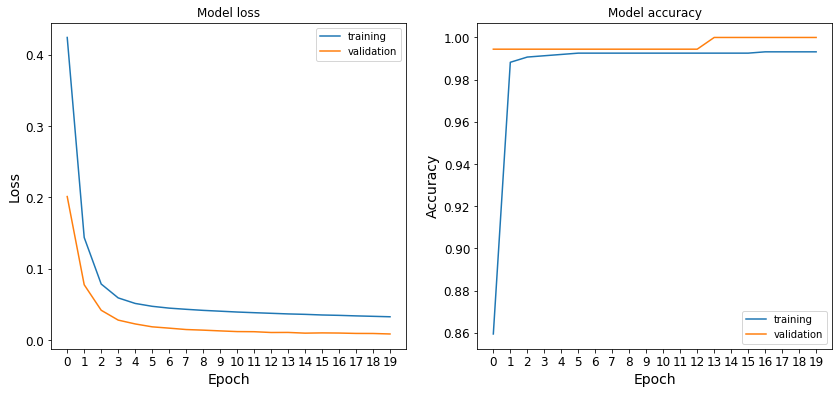

In [35]:
# Plot loss and val_loss as one plot, and accuracy and val_accuracy as another, side-by-side.
# We'll also save this plot as plot_history() in the helper_functions file, so any time we need to
# plot the history object like this we can just call that function and pass the history object as
# an argument.

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

num_epochs = len(history.history['loss'])

ax[0].plot(history.history['loss'], label='training')
ax[0].plot(history.history['val_loss'], label='validation')
#ax[0].plot(history2.history['loss'], label='training my method')
#ax[0].plot(history2.history['val_loss'], label='validation my method')
ax[0].set_title("Model loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_xticks(np.arange(num_epochs))
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='training')
ax[1].plot(history.history['val_accuracy'], label='validation')
#ax[1].plot(history2.history['accuracy'], label='training my method')
#ax[1].plot(history2.history['val_accuracy'], label='validation my method')
ax[1].set_title("Model accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].set_xticks(np.arange(num_epochs))
ax[1].legend()

#the _pre contain a number in [0,1] these get mapped to 1 if >0.5 and to 0 if <0.5
DNN_pred_train_pre = model.predict(X_train_stsc)
DNN_pred_val_pre = model.predict(X_val_stsc)
DNN_pred_train = DNN_pred_train_pre > 0.5
DNN_pred_val = DNN_pred_val_pre > 0.5


accuracy_train = accuracy_score(y_train, DNN_pred_train)
confmat_train = confusion_matrix(y_train, DNN_pred_train)
f1_train = f1_score(y_train, DNN_pred_train)
mcc_train = matthews_corrcoef(y_train, DNN_pred_train)
precision_train = precision_score(y_train, DNN_pred_train)
recall_train = recall_score(y_train, DNN_pred_train)

accuracy = accuracy_score(y_val, DNN_pred_val)
confmat = confusion_matrix(y_val, DNN_pred_val)
f1 = f1_score(y_val, DNN_pred_val)
mcc = matthews_corrcoef(y_val, DNN_pred_val)
precision = precision_score(y_val, DNN_pred_val)
recall = recall_score(y_val, DNN_pred_val)

print("Confusion matrix for training set:\n")
plot_confusion_matrix(y_train, DNN_pred_train, ["beam","reaction"])
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)
print("MCC:", mcc_train)
print(RFC_pred_train)

print("Confusion matrix for validation set:\n")
plot_confusion_matrix(y_val, DNN_pred_val, ["beam","reaction"])
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("MCC:", mcc)

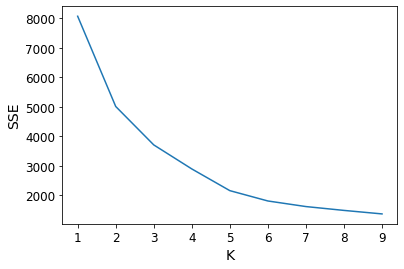

In [36]:
# let's apply K-Means
# first, check the optimal k

k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X_train_stsc)
    sse.append(km.inertia_)

sse
plt.xlabel('K')
plt.ylabel('SSE') #sum of squared error

plt.plot(k_rng,sse)

In [37]:
# Not really clear but it's 2, 3 or 5
# But since we already know there are two classes then we go for k = 5

[0 0 1 ... 0 0 0]
Confusion matrix for training set:



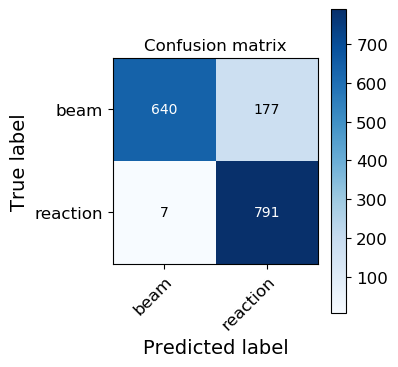

Accuracy: 0.8860681114551083
Precision: 0.8171487603305785
Recall: 0.9912280701754386
F1-score: 0.8958097395243487
MCC: 0.7902962936448293
[1 1 0 ... 0 0 1]
Confusion matrix for validation set:



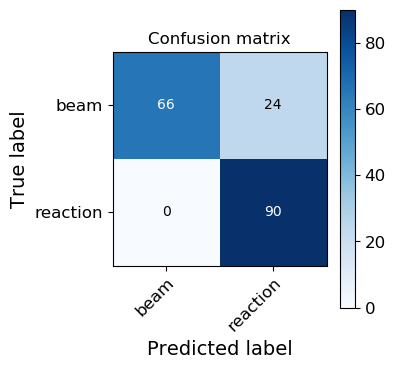

Accuracy: 0.8666666666666667
Precision: 0.7894736842105263
Recall: 1.0
F1-score: 0.8823529411764706
MCC: 0.760885910252682


In [38]:
from sklearn.cluster import KMeans

clust = KMeans(n_clusters=2).fit(X_train_stsc)
print(clust.labels_)
KM_pred_train = clust.predict(X_train_stsc)
KM_pred_val = clust.predict(X_val_stsc)

# Now we need to find out which cluster is which type of event
# We select the one that gives best accuracy on training set

accuracy_train_norm = accuracy_score(y_train, KM_pred_train)
accuracy_train_swap = accuracy_score(y_train, 1-KM_pred_train)

if(accuracy_train_swap>accuracy_train_norm):
    KM_pred_train = 1- KM_pred_train
    KM_pred_val = 1 - KM_pred_val

accuracy_train = accuracy_score(y_train, KM_pred_train)
confmat_train = confusion_matrix(y_train, KM_pred_train)
f1_train = f1_score(y_train, KM_pred_train)
mcc_train = matthews_corrcoef(y_train, KM_pred_train)
precision_train = precision_score(y_train, KM_pred_train)
recall_train = recall_score(y_train, KM_pred_train)

accuracy = accuracy_score(y_val, KM_pred_val)
confmat = confusion_matrix(y_val, KM_pred_val)
f1 = f1_score(y_val, KM_pred_val)
mcc = matthews_corrcoef(y_val, KM_pred_val)
precision = precision_score(y_val, KM_pred_val)
recall = recall_score(y_val, KM_pred_val)

print("Confusion matrix for training set:\n")
plot_confusion_matrix(y_train, KM_pred_train, ["beam","reaction"])
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)
print("MCC:", mcc_train)
print(RFC_pred_train)

print("Confusion matrix for validation set:\n")
plot_confusion_matrix(y_val, KM_pred_val, ["beam","reaction"])
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("MCC:", mcc)

In [58]:
X_train_stsc.shape

array([[ 0.00282519, -0.01683419,  0.89077256, -0.88319536, -0.79940286],
       [ 0.00282519, -0.01683419,  0.87429562, -0.85942233, -0.79940286],
       [ 1.8043147 ,  1.14182075, -0.4335255 ,  0.5117365 ,  1.19865087],
       ...,
       [-0.01530715,  0.06401004, -1.39532515, -0.80262854, -0.85170793],
       [-0.04759154, -0.05909715, -0.91765849, -0.02340968, -0.62156562],
       [ 0.00282519, -0.01683419,  1.40634114, -0.88222438, -0.79940286]])

PCA took 0.0s.


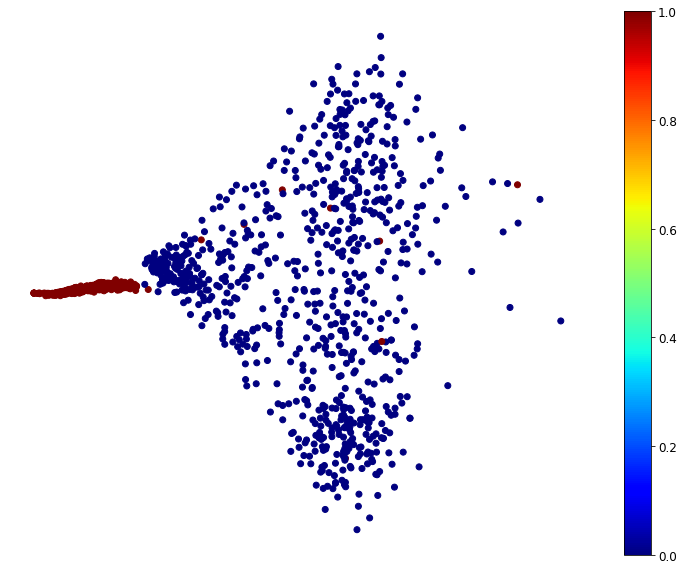

In [60]:
# # K-Means again but different way 
# To use K-Means properly, we need to decrease dimenstion to 2D using PCA (Principal Component Analysis)

from sklearn.decomposition import PCA
import time

t0 = time.time()
pca = PCA(n_components=2, random_state=42)
X_pca_reduced = pca.fit_transform(X_train_stsc)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
#plot_digits(X_pca_reduced, y_train)

#plt.show()

#plot

plt.figure(figsize=(13,10))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y_train, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [41]:
# check variance

print(pca.explained_variance_ratio_)

[0.43994123 0.21245435]


In [42]:
X_pca_reduced.shape # 2D training set (well we don't have test set in K-Means)

(1615, 2)

In [43]:
# choose the right number of dimensions

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train_stsc)

pca.n_components_

4

In [44]:
# showing 4D, does it mean we should't compress to 2D?

In [45]:
X_pca_reduced

array([[-1.45426284, -0.00684698],
       [-1.43236967, -0.00693691],
       [ 1.32108979, -0.46544368],
       ...,
       [-0.45854924,  0.36356401],
       [-0.03038319,  0.1469888 ],
       [-1.67371955, -0.07584802]])

In [46]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_pca_reduced)

y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [47]:
# As you can see, it assigned lables to data using 2 classes (k=2) as requested

In [48]:
# make sure all labeled

print(y_pred is kmeans.labels_)

# get cluster centers

print(kmeans.cluster_centers_)

# Evaluate a K-Mean model's performance
# Since it's unsupervised, we've no target to use for evaluation of model BUT..
# "inertia" is the sum of the squared distances between each training instance and its closest centroid

print(kmeans.inertia_)

# verify it was correctly calculated
# inertia is the sum of the squared distances between each training instance and its closest centroid

X_dist = kmeans.transform(X_pca_reduced) # measure distance of each instance to all 5 centroids.
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

True
[[-1.14478365  0.03689621]
 [ 1.65222936 -0.05325111]]
2210.2373386059394


2210.23733860594

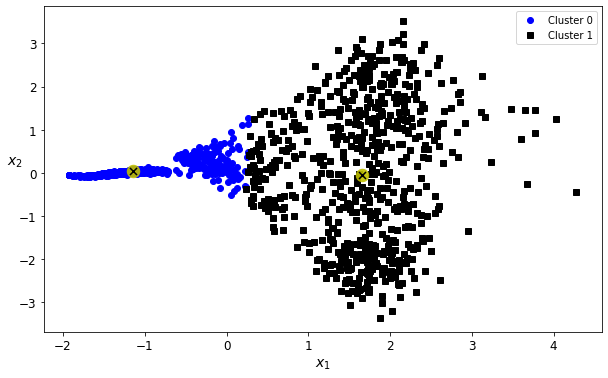

In [67]:
# But how good is our clustering?
# Visualize

plt.figure(figsize=(10, 6))

# data points

plt.plot(X_pca_reduced[y_pred==0, 0], X_pca_reduced[y_pred==0, 1], "bo", label="Cluster 0")
plt.plot(X_pca_reduced[y_pred==1, 0], X_pca_reduced[y_pred==1, 1], "ks", label="Cluster 1")

# centroids

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='o', s=30, linewidths=8,
            color='y', zorder=10, alpha=0.9)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=50, linewidths=50,
            color='k', zorder=11, alpha=1)

# labels

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.legend()

plt.show()

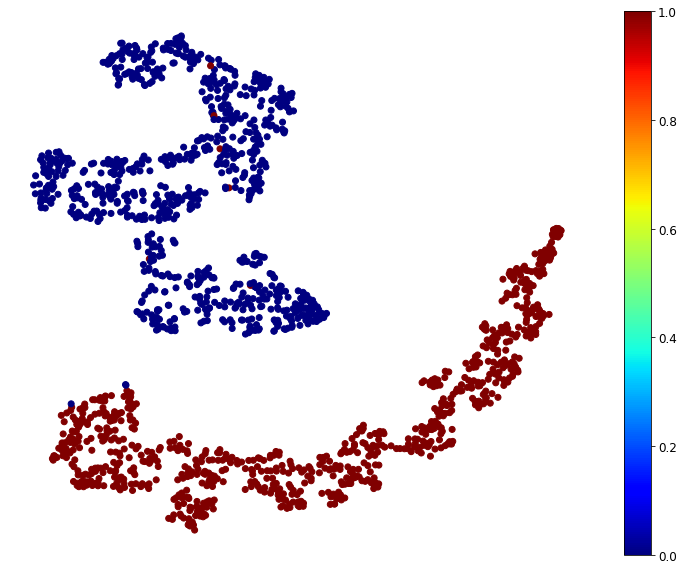

In [50]:
# try different dimensionality reduction technique
# t-SNE to reduce dimensionality

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_train_stsc)

#plot

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [51]:
X_reduced

array([[ 21.785746  , -40.965473  ],
       [ 20.425772  , -40.687283  ],
       [-31.441837  ,  28.669182  ],
       ...,
       [  9.633825  ,  -0.4610023 ],
       [ -5.110984  ,  -0.16386217],
       [ 47.20166   ,   5.161782  ]], dtype=float32)

In [52]:
X_reduced[:, 0]

array([ 21.785746,  20.425772, -31.441837, ...,   9.633825,  -5.110984,
        47.20166 ], dtype=float32)

In [53]:
# now apply to K-Means

k = 2
kmeans_TSNE = KMeans(n_clusters=k, random_state=42)
y_pred_TSNE = kmeans_TSNE.fit_predict(X_reduced)

y_pred_TSNE

array([1, 1, 0, ..., 1, 1, 1])

In [54]:
# make sure all labeled

print(y_pred is kmeans_TSNE.labels_) # should give TRUE

# get cluster centers

print(kmeans_TSNE.cluster_centers_)

# Evaluate a K-Mean model's performance
# Since it's unsupervised, we've no target to use for evaluation of model BUT..
# "inertia" is the sum of the squared distances between each training instance and its closest centroid

print(kmeans_TSNE.inertia_)

# verify it was correctly calculated
# inertia is the sum of the squared distances between each training instance and its closest centroid

X_dist = kmeans_TSNE.transform(X_reduced) # measure distance of each instance to all 5 centroids.
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

False
[[-11.038958  36.03529 ]
 [  9.912792 -21.101162]]
1151669.3410118327


7115217.5

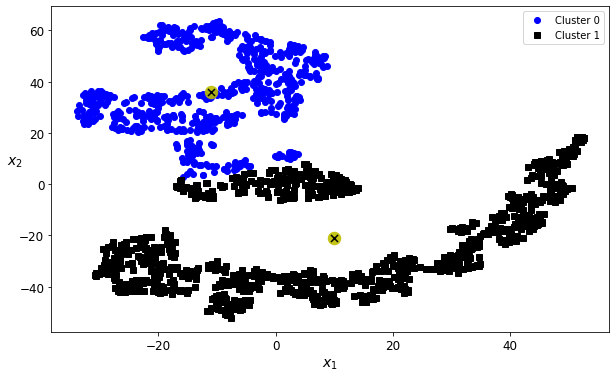

In [68]:
# Visualize again

plt.figure(figsize=(10, 6))

# data points

plt.plot(X_reduced[y_pred_TSNE==0, 0], X_reduced[y_pred_TSNE==0, 1], "bo", label="Cluster 1")
plt.plot(X_reduced[y_pred_TSNE==1, 0], X_reduced[y_pred_TSNE==1, 1], "ks", label="Cluster 0")

# centroids

plt.scatter(kmeans_TSNE.cluster_centers_[:,0], kmeans_TSNE.cluster_centers_[:,1], marker='o', s=30, linewidths=8,
            color='y', zorder=10, alpha=0.9)
plt.scatter(kmeans_TSNE.cluster_centers_[:,0], kmeans_TSNE.cluster_centers_[:,1], marker='x', s=50, linewidths=50,
            color='k', zorder=11, alpha=1)

# labels

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.legend()

plt.show()

In [56]:
# Training an SVM
# A model suited for linear or nonlinear classification, regression, and even outlier detection
# Especially well suited for classification of complex but small-medium datasets
# the idea is to keep the street large and limit margin violation to get best model (called soft margin classification)
# You control C hyperparameter to get best fit

In [70]:
# Indeed we better go for Nonlinear SVM Classification
# When a dataset can't be separated linearly, you have to add more features (i.e. polynomial) x2 = (x1)2 

# training an SVM classifier using a 3rd-degree polynomial kernel

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# now train the model

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ))
polynomial_svm_clf.fit(X_pca_reduced, y_train)

# make prediction on X_train

y_pred = polynomial_svm_clf.predict(X_pca_reduced)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


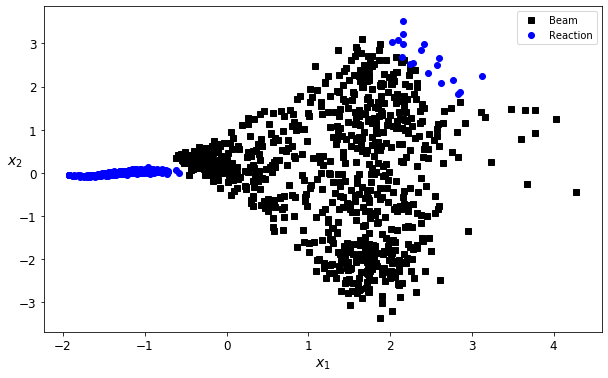

In [76]:
# plot

plt.figure(figsize=(10, 6))

plt.plot(X_pca_reduced[y_pred==0, 0], X_pca_reduced[y_pred==0, 1], "ks", label="Beam")
plt.plot(X_pca_reduced[y_pred==1, 0], X_pca_reduced[y_pred==1, 1], "bo", label="Reaction")

# labels

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.legend()

plt.show()

In [77]:
# Repeat with t-SNE

polynomial_svm_clf_TSNE = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge"))
    ))
polynomial_svm_clf_TSNE.fit(X_reduced, y_train)


y_pred = polynomial_svm_clf_TSNE.predict(X_reduced)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


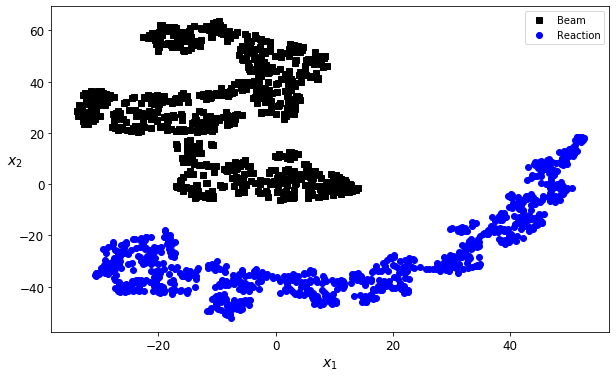

In [78]:
# plot

plt.figure(figsize=(10, 6))

plt.plot(X_reduced[y_pred==0, 0], X_reduced[y_pred==0, 1], "ks", label="Beam")
plt.plot(X_reduced[y_pred==1, 0], X_reduced[y_pred==1, 1], "bo", label="Reaction")

# labels

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.legend()

plt.show()

In [79]:
#Voting Classifier (ensemble learning)
#Simply build different classifiers then see the prediction of each
#The class that gets most votes = the winner :p
#following classifier (voting classifier) consists of 3 diverse classifiers

# let's first train a voting classifier on full dimensional data (5D)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train_stsc, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [80]:
# accuracy of classifier (on validation set)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_stsc, y_train)
    y_pred = clf.predict(X_val_stsc)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

LogisticRegression 0.9944444444444445
RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


In [81]:
# Wow! Cannot get better.

In [85]:
# transform X_val_stsc (validation set) to 2D (PCA)

t0 = time.time()
pca = PCA(n_components=2, random_state=42)
X_val_pca_reduced = pca.fit_transform(X_val_stsc)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))

PCA took 0.0s.


In [86]:
X_val_pca_reduced.shape # validation set became 2D

(180, 2)

In [90]:
# Voting Classifier for 2D data (PCA technique)

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_pca_reduced, y_train)

# accuracy

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_pca_reduced, y_train)
    y_pred_vot_pca = clf.predict(X_val_pca_reduced)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred_vot_pca))

LogisticRegression 0.9944444444444445
RandomForestClassifier 0.9722222222222222
SVC 1.0
VotingClassifier 0.9944444444444445


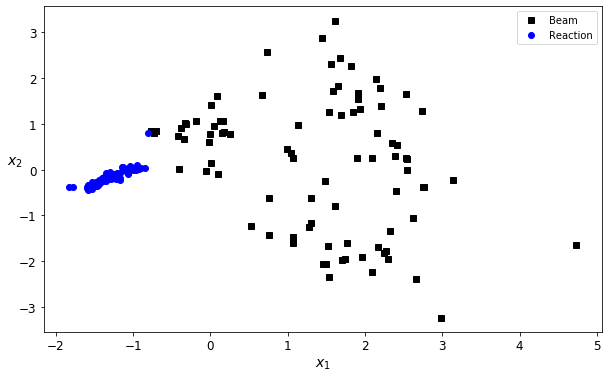

In [92]:
# plot

plt.figure(figsize=(10, 6))

plt.plot(X_val_pca_reduced[y_pred_vot_pca==0, 0], X_val_pca_reduced[y_pred_vot_pca==0, 1], "ks", label="Beam")
plt.plot(X_val_pca_reduced[y_pred_vot_pca==1, 0], X_val_pca_reduced[y_pred_vot_pca==1, 1], "bo", label="Reaction")

# labels

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.legend()

plt.show()

In [88]:
# Still good for 2D data (from PCA)